In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# **Simulation Questions**

# a) Hodgkin-Huxley model

In [ ]:
# Equations of the Hodgkin-Huxley model
def hh_model(y, t, I):
    V, n, m, h = y
    gNa, gK, gL = 120, 36, 0.3
    ENa, EK, EL = 50, -77, -54.4
    C = 1

    # Alpha and beta functions
    # alpha_n = 0.02 * (V - 25) / (1 - np.exp(-(V - 25) / 9))
    # beta_n = -0.002 * (V - 25) / (1 - np.exp((V - 25) / 9))
    # alpha_m = 0.182 * (V + 35) / (1 - np.exp(-(V + 35) / 9))
    # beta_m = -0.124 * (V + 35) / (1 - np.exp((V + 35) / 9))
    # alpha_h = 0.25 * np.exp(-(V + 90) / 12)
    # beta_h = 0.25 * np.exp((V + 62) / 6) / np.exp((V + 90) / 12)

    alpha_m = 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))
    beta_m = 4 * np.exp(-(V + 65) / 18)
    alpha_h = 0.07 * np.exp(-(V + 65) / 20)
    beta_h = 1 / (1 + np.exp(-(V + 35) / 10))
    alpha_n = 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))
    beta_n = 0.125 * np.exp(-(V + 65) / 80)

    # Gating variables derivatives
    dn = alpha_n * (1 - n) - beta_n * n
    dm = alpha_m * (1 - m) - beta_m * m
    dh = alpha_h * (1 - h) - beta_h * h

    # Currents
    INa = gNa * (m**3) * h * (V - ENa)
    IK = gK * (n**4) * (V - EK)
    IL = gL * (V - EL)

    # Membrane potential derivative
    dV = (I - INa - IK - IL) / C

    return [dV, dn, dm, dh]

# Simulate Hodgkin-Huxley model for a given current I
def simulate_hh(I):
    solution = odeint(hh_model, y0, t, args=(I,))
    V = solution[:, 0]
    return V

In [ ]:
# Initial conditions
V0 = -65
n0 = 0.32
m0 = 0.05
h0 = 0.6
y0 = [V0, n0, m0, h0]

# Time points
t = np.linspace(0, 50, 10000)

# Find the threshold current by gradually increasing I
threshold_current = None
for I in np.arange(0, 50, 0.01):
    V = simulate_hh(I)
    if max(V) > 0:  # Action potential occurs if V exceeds 0 mV
        threshold_current = I
        break

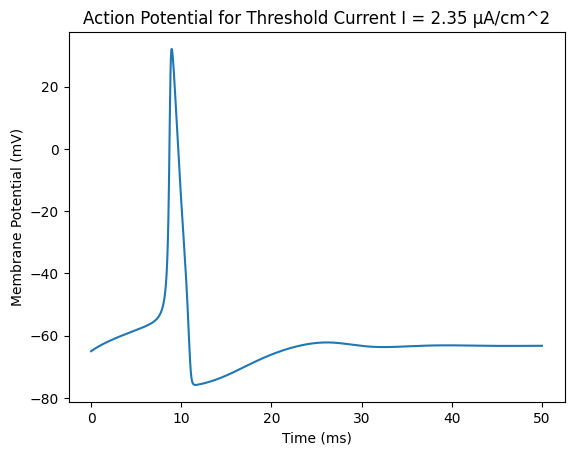

Threshold current: 2.35 μA/cm^2


In [ ]:
# Plot the results
V = simulate_hh(threshold_current)
plt.plot(t, V)
plt.title(f'Action Potential for Threshold Current I = {threshold_current:.2f} μA/cm^2')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.show()

print(f"Threshold current: {threshold_current:.2f} μA/cm^2")

# b) Various amplitude and duration of the applied current

Firing rate for I = 1 μA/cm², Duration = 5 ms: 0.00 Hz
Firing rate for I = 1 μA/cm², Duration = 15 ms: 0.00 Hz
Firing rate for I = 1 μA/cm², Duration = 35 ms: 0.00 Hz
Firing rate for I = 1 μA/cm², Duration = 50 ms: 0.00 Hz
Firing rate for I = 2.4 μA/cm², Duration = 5 ms: 0.00 Hz
Firing rate for I = 2.4 μA/cm², Duration = 15 ms: 66.67 Hz
Firing rate for I = 2.4 μA/cm², Duration = 35 ms: 28.57 Hz
Firing rate for I = 2.4 μA/cm², Duration = 50 ms: 20.00 Hz
Firing rate for I = 10 μA/cm², Duration = 5 ms: 200.00 Hz
Firing rate for I = 10 μA/cm², Duration = 15 ms: 66.67 Hz
Firing rate for I = 10 μA/cm², Duration = 35 ms: 85.71 Hz
Firing rate for I = 10 μA/cm², Duration = 50 ms: 80.00 Hz
Firing rate for I = 30 μA/cm², Duration = 5 ms: 200.00 Hz
Firing rate for I = 30 μA/cm², Duration = 15 ms: 133.33 Hz
Firing rate for I = 30 μA/cm², Duration = 35 ms: 114.29 Hz
Firing rate for I = 30 μA/cm², Duration = 50 ms: 100.00 Hz


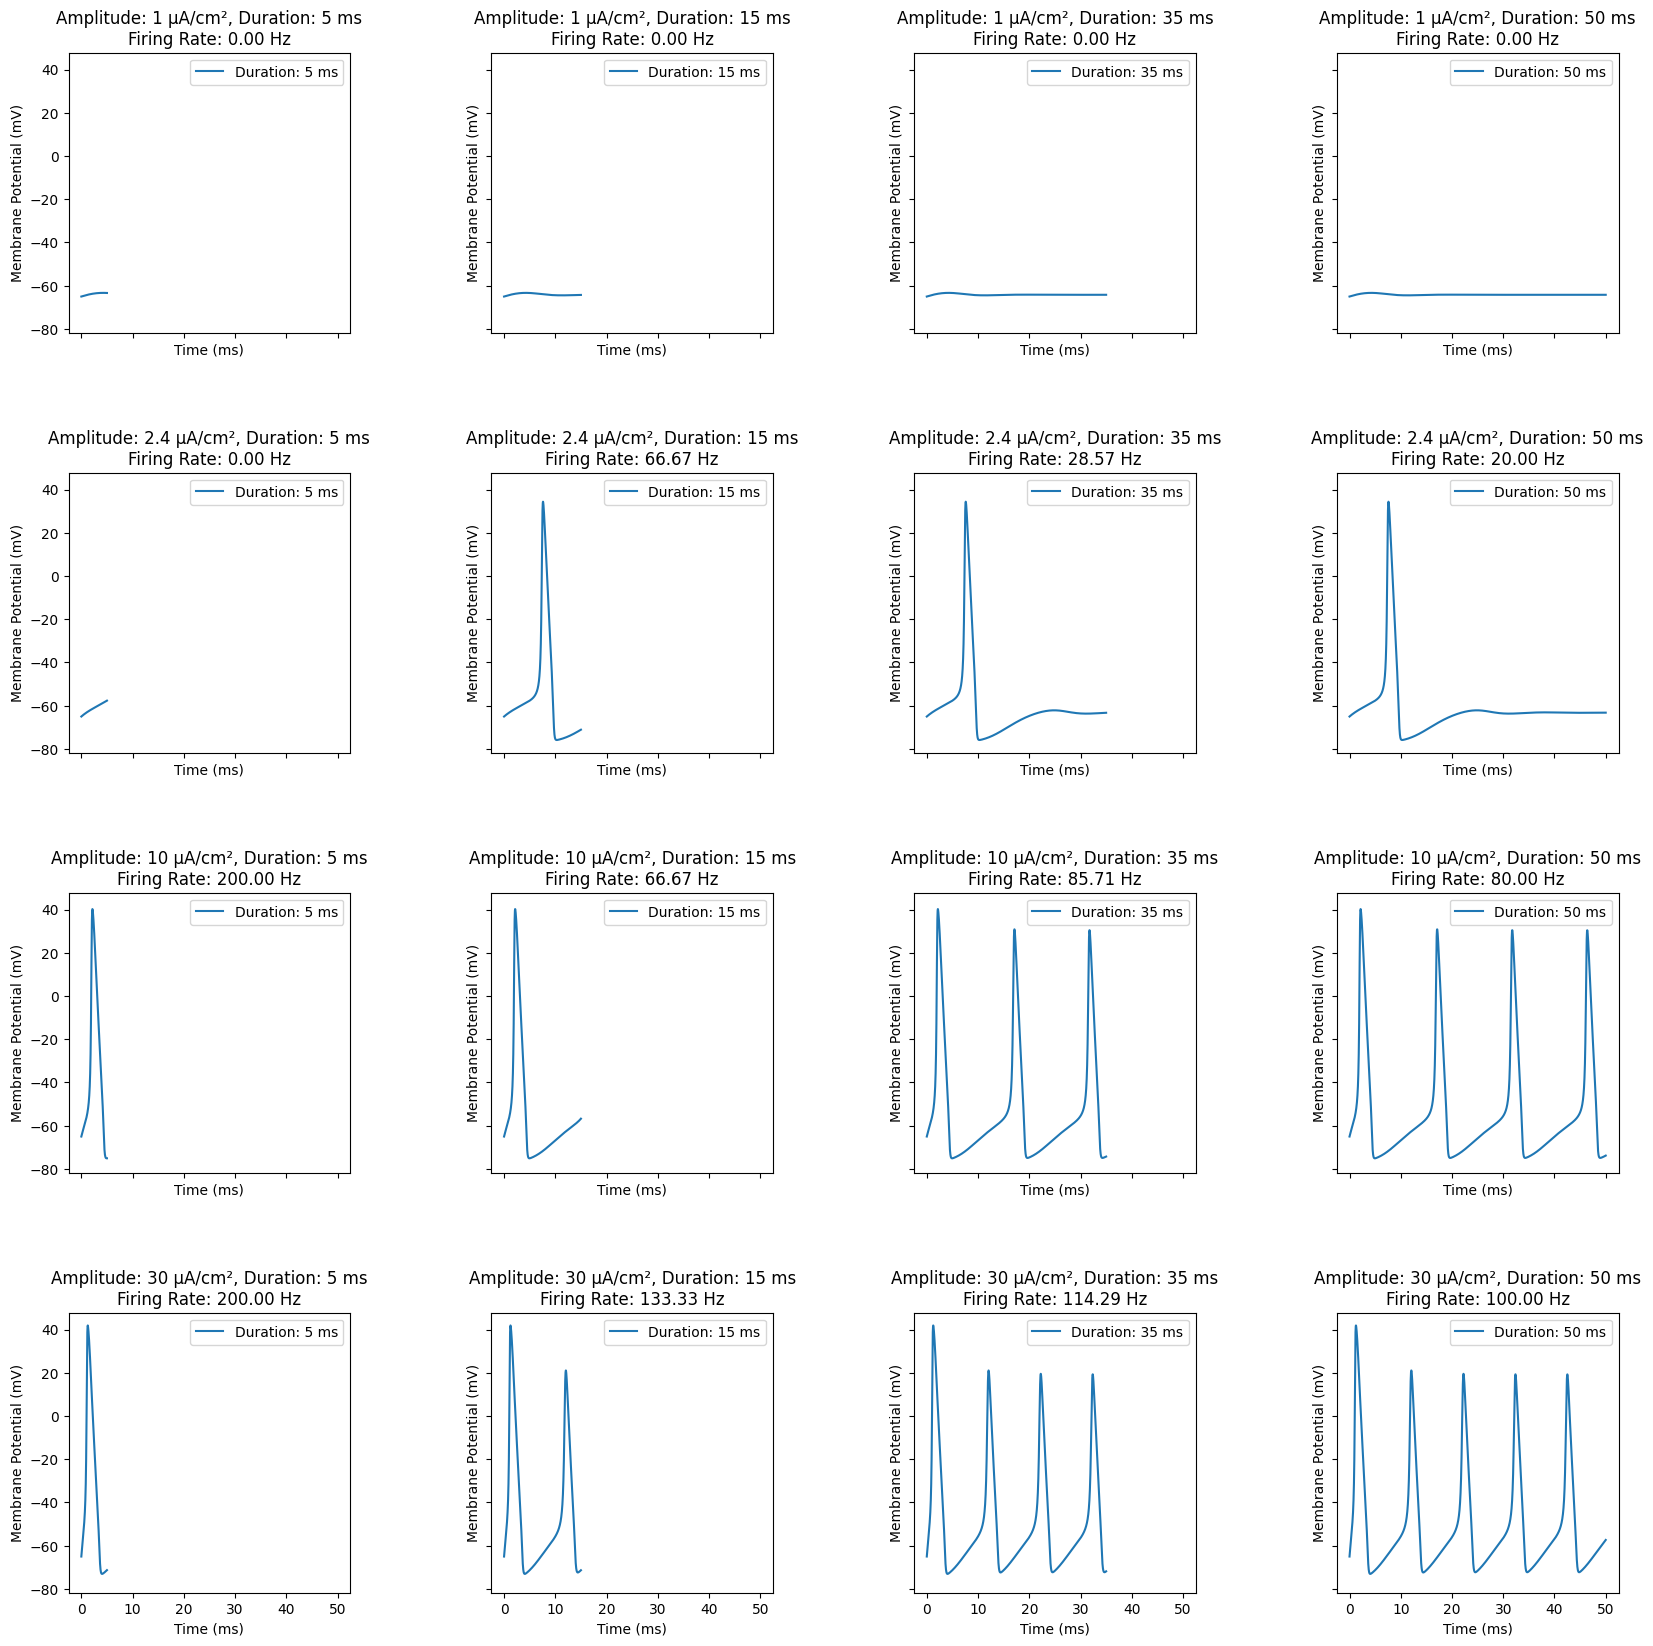

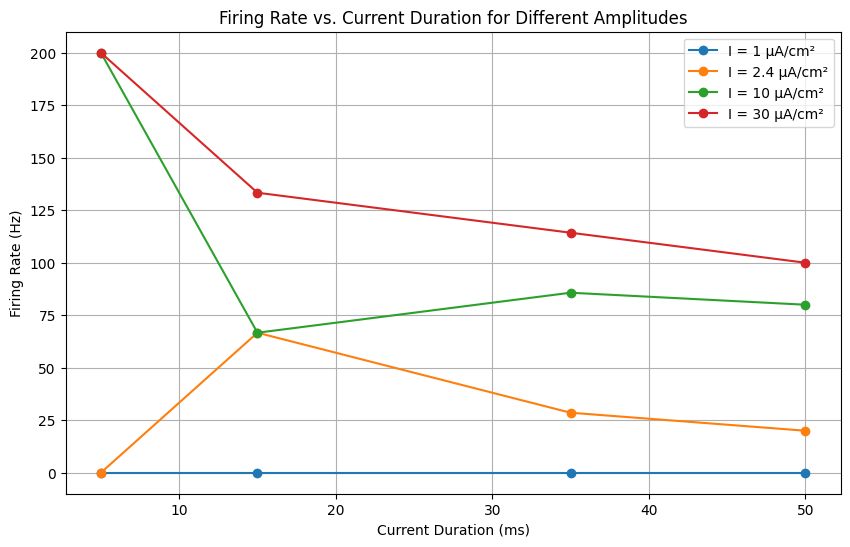

In [ ]:
# Constants
C = 1.0  # µF/cm^2
gNa, gK, gL = 120.0, 36.0, 0.3  # mS/cm^2
ENa, EK, EL = 50.0, -77.0, -54.4  # mV

# Time parameters
dt = 0.001  # ms

# Initial conditions
V0 = -65.0
n0 = 0.32
m0 = 0.05
h0 = 0.6
y0 = [V0, n0, m0, h0]

# Time points
max_duration = max([5, 15, 35, 50])  # ms
t = np.arange(0, max_duration + dt, dt)

# Function to apply current for a specified duration
def current_injection(I, duration):
    def I_func(t):
        return I if t <= duration else 0.0
    return I_func

# Equations of the Hodgkin-Huxley model
def hh_model(y, t, I_func):
    V, n, m, h = y
    gNa, gK, gL = 120, 36, 0.3
    ENa, EK, EL = 50, -77, -54.4
    C = 1

    # Alpha and beta functions
    # alpha_n = 0.02 * (V - 25) / (1 - np.exp(-(V - 25) / 9))
    # beta_n = -0.002 * (V - 25) / (1 - np.exp((V - 25) / 9))
    # alpha_m = 0.182 * (V + 35) / (1 - np.exp(-(V + 35) / 9))
    # beta_m = -0.124 * (V + 35) / (1 - np.exp((V + 35) / 9))
    # alpha_h = 0.25 * np.exp(-(V + 90) / 12)
    # beta_h = 0.25 * np.exp((V + 62) / 6) / np.exp((V + 90) / 12)

    alpha_m = 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))
    beta_m = 4 * np.exp(-(V + 65) / 18)
    alpha_h = 0.07 * np.exp(-(V + 65) / 20)
    beta_h = 1 / (1 + np.exp(-(V + 35) / 10))
    alpha_n = 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))
    beta_n = 0.125 * np.exp(-(V + 65) / 80)

    # Gating variables derivatives
    dn = alpha_n * (1 - n) - beta_n * n
    dm = alpha_m * (1 - m) - beta_m * m
    dh = alpha_h * (1 - h) - beta_h * h

    # Currents
    INa = gNa * (m**3) * h * (V - ENa)
    IK = gK * (n**4) * (V - EK)
    IL = gL * (V - EL)

    # Membrane potential derivative
    I = I_func(t)
    dV = (I - INa - IK - IL) / C

    return [dV, dn, dm, dh]

# Simulate Hodgkin-Huxley model for a given current function
def simulate_hh(I_func):
    solution = odeint(hh_model, y0, t, args=(I_func,))
    V = solution[:, 0]
    return V, t

# Function to detect spikes and calculate firing rate
def calculate_firing_rate(V, time, duration, threshold=0.0):
    limited_time = time[time <= duration]
    limited_V = V[:len(limited_time)]
    spikes = (limited_V[:-1] < threshold) & (limited_V[1:] >= threshold)
    spike_times = limited_time[:-1][spikes]
    num_spikes = len(spike_times)
    total_time = limited_time[-1] - limited_time[0]  # in ms
    firing_rate = (num_spikes / total_time) * 1000  # Convert to Hz
    return firing_rate

# Function to plot results
def plot_action_potentials(amplitudes, durations):
    fig, axs = plt.subplots(len(amplitudes), len(durations), figsize=(20, 20), sharex=True, sharey=True)
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    for i, amplitude in enumerate(amplitudes):
        for j, duration in enumerate(durations):
            I_func = current_injection(amplitude, duration)
            V, time = simulate_hh(I_func)
            firing_rate = calculate_firing_rate(V, time, duration)
            axs[i, j].plot(time[time <= duration], V[:len(time[time <= duration])], label=f'Duration: {duration} ms')
            axs[i, j].set_xlabel('Time (ms)')
            axs[i, j].set_ylabel('Membrane Potential (mV)')
            axs[i, j].set_title(f'Amplitude: {amplitude} µA/cm², Duration: {duration} ms\nFiring Rate: {firing_rate:.2f} Hz')
            axs[i, j].legend()

    plt.show()

# Investigate the effects of varying the amplitude and duration of the applied current
amplitudes = [1, 2.4, 10, 30]  # Different current amplitudes
durations = [5, 15, 35, 50]    # Different current durations

# Initialize array to store firing rates
firing_rates = np.zeros((len(amplitudes), len(durations)))

# Simulate and calculate firing rates for different amplitudes and durations
for i, I in enumerate(amplitudes):
    for j, dur in enumerate(durations):
        I_func = current_injection(I, dur)
        V, time = simulate_hh(I_func)  # Get both V and time
        firing_rate = calculate_firing_rate(V, time, dur)  # Use the returned time points and limit to duration
        firing_rates[i, j] = firing_rate
        print(f'Firing rate for I = {I} μA/cm², Duration = {dur} ms: {firing_rate:.2f} Hz')

# Plot results
plot_action_potentials(amplitudes, durations)

# Plotting firing rates
plt.figure(figsize=(10, 6))
for i, I in enumerate(amplitudes):
    plt.plot(durations, firing_rates[i, :], marker='o', label=f'I = {I} μA/cm²')
plt.title('Firing Rate vs. Current Duration for Different Amplitudes')
plt.xlabel('Current Duration (ms)')
plt.ylabel('Firing Rate (Hz)')
plt.legend()
plt.grid(True)
plt.show()


# c) Different initial conditions

Plotting variations for V0


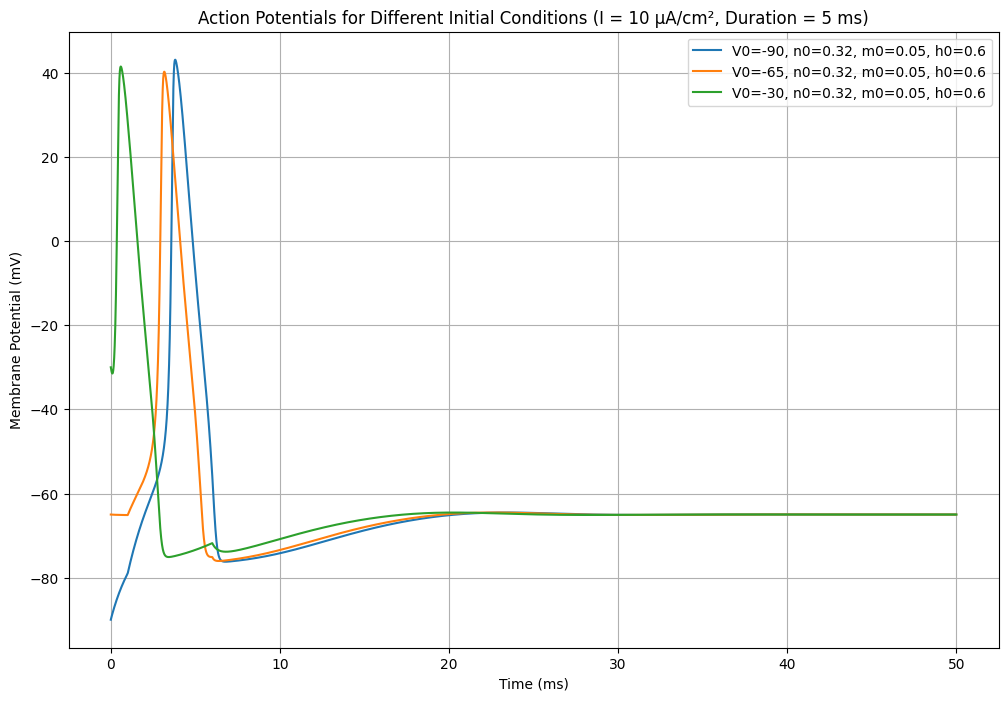

Initial conditions: V0=-90, n0=0.32, m0=0.05, h0=0.6
  Peak voltage: 43.10743695287793 mV
  Half-width: 1.8651865186518655 ms
  Duration above zero: 1.2601260126012606 ms

Initial conditions: V0=-65, n0=0.32, m0=0.05, h0=0.6
  Peak voltage: 40.25350127139902 mV
  Half-width: 1.4701470147014701 ms
  Duration above zero: 1.1601160116011604 ms

Initial conditions: V0=-30, n0=0.32, m0=0.05, h0=0.6
  Peak voltage: 41.48387881442673 mV
  Half-width: 1.08010801080108 ms
  Duration above zero: 1.215121512151215 ms

Plotting variations for n0


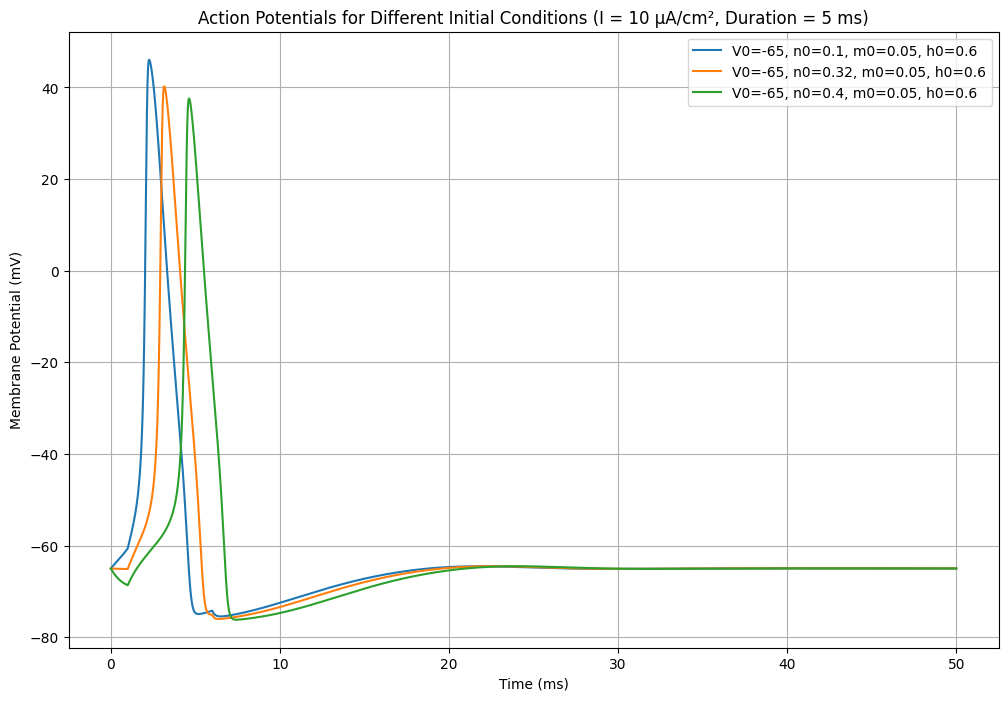

Initial conditions: V0=-65, n0=0.1, m0=0.05, h0=0.6
  Peak voltage: 46.052550734354035 mV
  Half-width: 1.5151515151515151 ms
  Duration above zero: 1.295129512951295 ms

Initial conditions: V0=-65, n0=0.32, m0=0.05, h0=0.6
  Peak voltage: 40.25350127139902 mV
  Half-width: 1.4701470147014701 ms
  Duration above zero: 1.1601160116011604 ms

Initial conditions: V0=-65, n0=0.4, m0=0.05, h0=0.6
  Peak voltage: 37.59029921795174 mV
  Half-width: 1.4601460146014604 ms
  Duration above zero: 1.115111511151115 ms

Plotting variations for m0


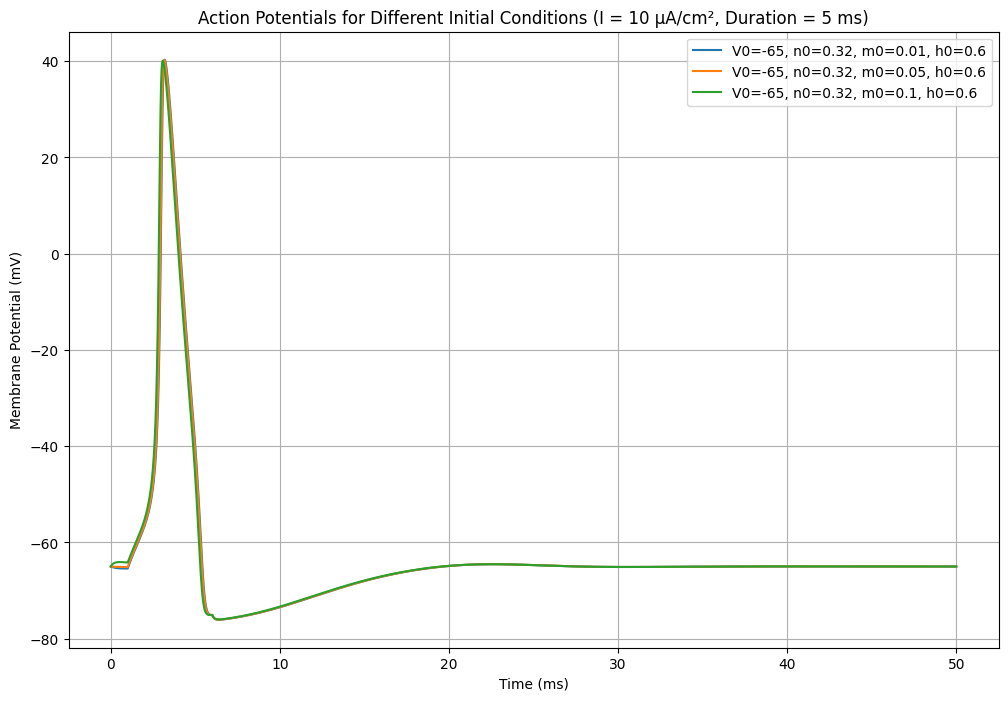

Initial conditions: V0=-65, n0=0.32, m0=0.01, h0=0.6
  Peak voltage: 40.299770216523015 mV
  Half-width: 1.4701470147014701 ms
  Duration above zero: 1.1651165116511657 ms

Initial conditions: V0=-65, n0=0.32, m0=0.05, h0=0.6
  Peak voltage: 40.25350127139902 mV
  Half-width: 1.4701470147014701 ms
  Duration above zero: 1.1601160116011604 ms

Initial conditions: V0=-65, n0=0.32, m0=0.1, h0=0.6
  Peak voltage: 40.09890263403185 mV
  Half-width: 1.4651465146514653 ms
  Duration above zero: 1.1601160116011604 ms

Plotting variations for h0


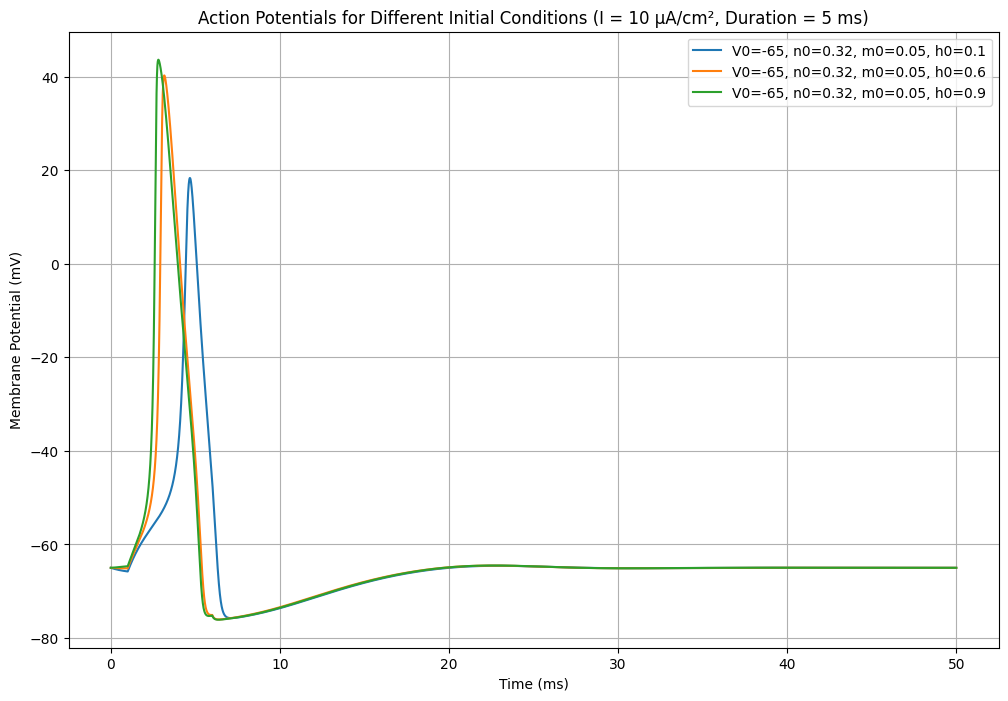

Initial conditions: V0=-65, n0=0.32, m0=0.05, h0=0.1
  Peak voltage: 18.330966636005666 mV
  Half-width: 1.265126512651265 ms
  Duration above zero: 0.6450645064506455 ms

Initial conditions: V0=-65, n0=0.32, m0=0.05, h0=0.6
  Peak voltage: 40.25350127139902 mV
  Half-width: 1.4701470147014701 ms
  Duration above zero: 1.1601160116011604 ms

Initial conditions: V0=-65, n0=0.32, m0=0.05, h0=0.9
  Peak voltage: 43.61176223847854 mV
  Half-width: 1.6301630163016303 ms
  Duration above zero: 1.3601360136013603 ms



In [ ]:
# Equations of the Hodgkin-Huxley model
def hh_model(y, t, I_func):
    V, n, m, h = y
    gNa, gK, gL = 120, 36, 0.3
    ENa, EK, EL = 50, -77, -54.4
    C = 1

    # Alpha and beta functions
    # alpha_n = 0.02 * (V - 25) / (1 - np.exp(-(V - 25) / 9))
    # beta_n = -0.002 * (V - 25) / (1 - np.exp((V - 25) / 9))
    # alpha_m = 0.182 * (V + 35) / (1 - np.exp(-(V + 35) / 9))
    # beta_m = -0.124 * (V + 35) / (1 - np.exp((V + 35) / 9))
    # alpha_h = 0.25 * np.exp(-(V + 90) / 12)
    # beta_h = 0.25 * np.exp((V + 62) / 6) / np.exp((V + 90) / 12)

    alpha_m = 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))
    beta_m = 4 * np.exp(-(V + 65) / 18)
    alpha_h = 0.07 * np.exp(-(V + 65) / 20)
    beta_h = 1 / (1 + np.exp(-(V + 35) / 10))
    alpha_n = 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))
    beta_n = 0.125 * np.exp(-(V + 65) / 80)

    # Gating variables derivatives
    dn = alpha_n * (1 - n) - beta_n * n
    dm = alpha_m * (1 - m) - beta_m * m
    dh = alpha_h * (1 - h) - beta_h * h

    # Currents
    INa = gNa * (m**3) * h * (V - ENa)
    IK = gK * (n**4) * (V - EK)
    IL = gL * (V - EL)

    # Membrane potential derivative
    I = I_func(t)
    dV = (I - INa - IK - IL) / C

    return [dV, dn, dm, dh]

# Time points
t = np.linspace(0, 50, 10000)

# Function to apply current for a specified duration
def current_injection(I, duration):
    def I_func(t):
        if 1 <= t <= 1 + duration:
            return I
        return 0
    return I_func

# Simulate Hodgkin-Huxley model for a given current function
def simulate_hh(I_func, initial_conditions):
    solution = odeint(hh_model, initial_conditions, t, args=(I_func,))
    V = solution[:, 0]
    return V

# Function to simulate and plot action potentials for different initial conditions
def plot_initial_conditions_effect(initial_conditions_list, I, duration):
    plt.figure(figsize=(12, 8))
    I_func = current_injection(I, duration)

    results = []

    for initial_conditions in initial_conditions_list:
        V = simulate_hh(I_func, initial_conditions)
        plt.plot(t, V, label=f'V0={initial_conditions[0]}, n0={initial_conditions[1]}, m0={initial_conditions[2]}, h0={initial_conditions[3]}')

        peak_voltage = np.max(V)
        half_max = (peak_voltage + initial_conditions[0]) / 2
        above_half_max = np.where(V > half_max)[0]
        if len(above_half_max) > 1:
            half_width = t[above_half_max[-1]] - t[above_half_max[0]]
        else:
            half_width = np.nan
        duration_above_zero = t[V > 0][-1] - t[V > 0][0]

        results.append({
            'initial_conditions': initial_conditions,
            'peak_voltage': peak_voltage,
            'half_width': half_width,
            'duration_above_zero': duration_above_zero
        })

    plt.title(f'Action Potentials for Different Initial Conditions (I = {I} μA/cm², Duration = {duration} ms)')
    plt.xlabel('Time (ms)')
    plt.ylabel('Membrane Potential (mV)')
    plt.legend()
    plt.grid(True)
    plt.show()

    for result in results:
        print(f"Initial conditions: V0={result['initial_conditions'][0]}, n0={result['initial_conditions'][1]}, m0={result['initial_conditions'][2]}, h0={result['initial_conditions'][3]}")
        print(f"  Peak voltage: {result['peak_voltage']} mV")
        print(f"  Half-width: {result['half_width']} ms")
        print(f"  Duration above zero: {result['duration_above_zero']} ms\n")

# Define sets of initial conditions to isolate the effect of each parameter
initial_conditions_variations = {
    'V0': [
        [-90, 0.32, 0.05, 0.6],
        [-65, 0.32, 0.05, 0.6],
        [-30, 0.32, 0.05, 0.6]
    ],
    'n0': [
        [-65, 0.1, 0.05, 0.6],
        [-65, 0.32, 0.05, 0.6],
        [-65, 0.4, 0.05, 0.6]
    ],
    'm0': [
        [-65, 0.32, 0.01, 0.6],
        [-65, 0.32, 0.05, 0.6],
        [-65, 0.32, 0.1, 0.6]
    ],
    'h0': [
        [-65, 0.32, 0.05, 0.1],
        [-65, 0.32, 0.05, 0.6],
        [-65, 0.32, 0.05, 0.9]
    ]
}

# Investigate the effects of different initial conditions
I = 10       # Current amplitude
duration = 5  # Current duration

# Plot for each parameter variation
for param, variations in initial_conditions_variations.items():
    print(f'Plotting variations for {param}')
    plot_initial_conditions_effect(variations, I, duration)


# **Computational Problems**

# a) The amplitude equal to 20 μA/cm2 lasting 0.2ms - minimum excitation current for 5 different excitation widths

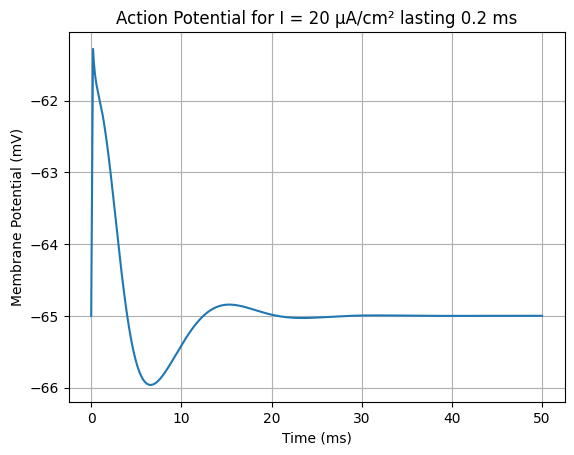

The minimum amplitude of excitation for a duration of 0.2 ms is 34.2 μA/cm²
Minimum excitation currents for different excitation widths:
Width: 0.1 ms, Minimum Current: 68.20000000 μA/cm²
Width: 0.2 ms, Minimum Current: 34.20000000 μA/cm²
Width: 0.3 ms, Minimum Current: 22.90000000 μA/cm²
Width: 0.5 ms, Minimum Current: 13.90000000 μA/cm²
Width: 0.8 ms, Minimum Current: 8.90000000 μA/cm²
Width: 1 ms, Minimum Current: 7.30000000 μA/cm²
Width: 1.5 ms, Minimum Current: 5.10000000 μA/cm²
Width: 2 ms, Minimum Current: 4.10000000 μA/cm²
Width: 5 ms, Minimum Current: 2.50000000 μA/cm²
Width: 10 ms, Minimum Current: 2.40000000 μA/cm²
Width: 20 ms, Minimum Current: 2.40000000 μA/cm²
Width: 30 ms, Minimum Current: 2.40000000 μA/cm²
Width: 50 ms, Minimum Current: 2.40000000 μA/cm²


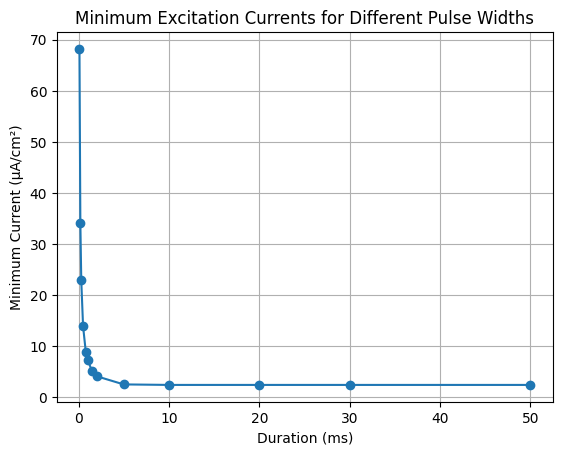

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Hodgkin-Huxley model equations
def hh_model(y, t, I_amp, duration):
    V, n, m, h = y
    gNa, gK, gL = 120, 36, 0.3
    ENa, EK, EL = 50, -77, -54.4
    C = 1

    # Alpha and beta functions
    # alpha_n = 0.02 * (V - 25) / (1 - np.exp(-(V - 25) / 9))
    # beta_n = -0.002 * (V - 25) / (1 - np.exp((V - 25) / 9))
    # alpha_m = 0.182 * (V + 35) / (1 - np.exp(-(V + 35) / 9))
    # beta_m = -0.124 * (V + 35) / (1 - np.exp((V + 35) / 9))
    # alpha_h = 0.25 * np.exp(-(V + 90) / 12)
    # beta_h = 0.25 * np.exp((V + 62) / 6) / np.exp((V + 90) / 12)

    alpha_m = 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))
    beta_m = 4 * np.exp(-(V + 65) / 18)
    alpha_h = 0.07 * np.exp(-(V + 65) / 20)
    beta_h = 1 / (1 + np.exp(-(V + 35) / 10))
    alpha_n = 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))
    beta_n = 0.125 * np.exp(-(V + 65) / 80)

    # Gating variables derivatives
    dn = alpha_n * (1 - n) - beta_n * n
    dm = alpha_m * (1 - m) - beta_m * m
    dh = alpha_h * (1 - h) - beta_h * h

    # Currents
    INa = gNa * (m**3) * h * (V - ENa)
    IK = gK * (n**4) * (V - EK)
    IL = gL * (V - EL)

    # Current pulse
    I = I_amp if t < duration else 0

    # Membrane potential derivative
    dV = (I - INa - IK - IL) / C

    return [dV, dn, dm, dh]

# Simulate Hodgkin-Huxley model for a given current pulse
def simulate_hh(I_amp, duration):
    y0 = [-65, 0.32, 0.05, 0.6]
    t = np.linspace(0, 50, 10000)
    solution = odeint(hh_model, y0, t, args=(I_amp, duration))
    V = solution[:, 0]
    return t, V

# Function to check if an action potential is generated
def has_action_potential(V):
    return np.max(V) > -20  # Use a more appropriate threshold for action potential

# Find the minimum amplitude of excitation
def find_minimum_amplitude(duration, step=0.1, max_amp=100):
    for I_amp in np.arange(0, max_amp, step):
        t, V = simulate_hh(I_amp, duration)
        if has_action_potential(V):
            return I_amp
    return None  # If no action potential is found within the range

# Parameters for the current pulse
I_amp = 20  # μA/cm²
duration = 0.2  # ms

# Step 1: Simulate and plot the action potential
t, V = simulate_hh(I_amp, duration)
plt.plot(t, V)
plt.title(f'Action Potential for I = {I_amp} μA/cm² lasting {duration} ms')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.grid(True)
plt.show()

# Step 2: Find the minimum amplitude of excitation for a fixed duration
fixed_duration = 0.2  # ms
min_amplitude = find_minimum_amplitude(fixed_duration)
print(f'The minimum amplitude of excitation for a duration of {fixed_duration} ms is {min_amplitude} μA/cm²')

# Step 3: Compute the minimum excitation current for different excitation widths
excitation_widths = [0.1, 0.2, 0.3, 0.5, 0.8, 1, 1.5, 2, 5, 10, 20, 30, 50]  # ms
min_currents = []

for width in excitation_widths:
    min_amp = find_minimum_amplitude(width)
    min_currents.append((width, min_amp))

print("Minimum excitation currents for different excitation widths:")
for width, current in min_currents:
    print(f'Width: {width} ms, Minimum Current: {current:.8f} μA/cm²')

# Plot minimum excitation currents for different widths
widths, currents = zip(*min_currents)
plt.plot(widths, currents, 'o-')
plt.xlabel('Duration (ms)')
plt.ylabel('Minimum Current (μA/cm²)')
plt.title('Minimum Excitation Currents for Different Pulse Widths')
plt.grid(True)
plt.show()


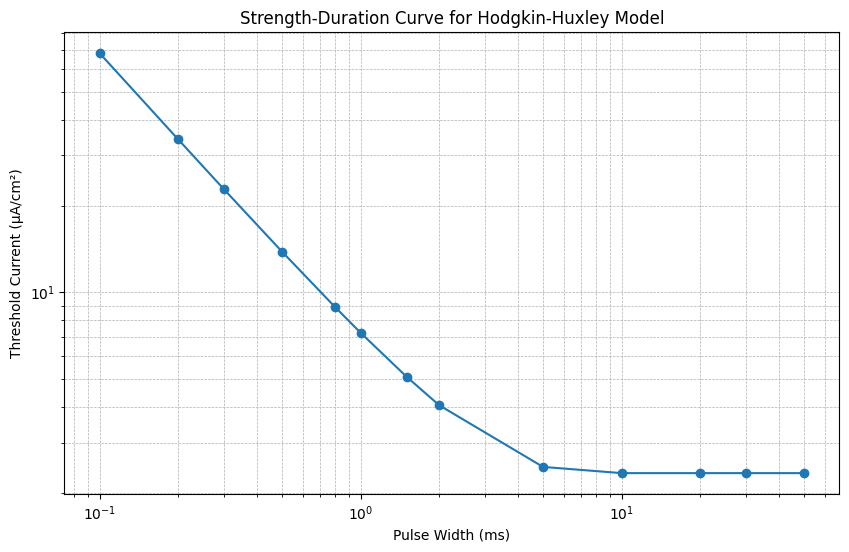

In [7]:
# Separate the results into widths and currents for plotting
widths, currents = zip(*results)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(widths, currents, marker='o')
plt.title('Strength-Duration Curve for Hodgkin-Huxley Model')
plt.xlabel('Pulse Width (ms)')
plt.ylabel('Threshold Current (μA/cm²)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# b) gNa and gK over time - the time change of m, n and h

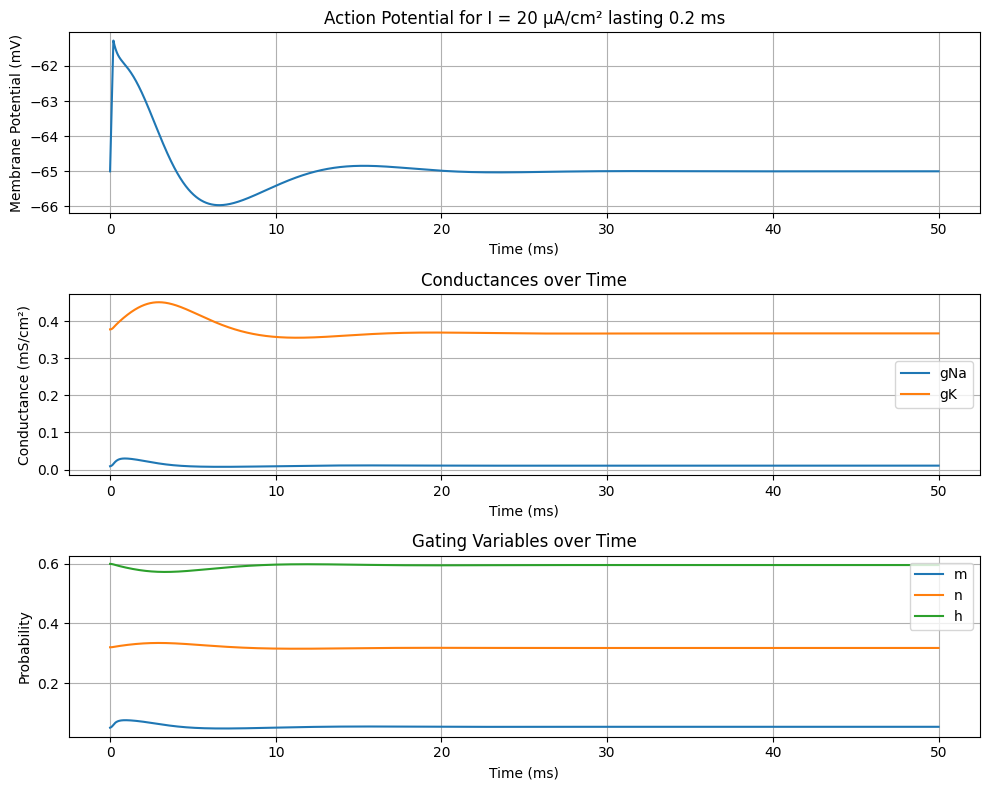

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Hodgkin-Huxley model equations
def hh_model(y, t, I_amp, duration):
    V, n, m, h = y
    gNa, gK, gL = 120, 36, 0.3
    ENa, EK, EL = 50, -77, -54.4
    C = 1

    # Alpha and beta functions
    # alpha_n = 0.02 * (V - 25) / (1 - np.exp(-(V - 25) / 9))
    # beta_n = -0.002 * (V - 25) / (1 - np.exp((V - 25) / 9))
    # alpha_m = 0.182 * (V + 35) / (1 - np.exp(-(V + 35) / 9))
    # beta_m = -0.124 * (V + 35) / (1 - np.exp((V + 35) / 9))
    # alpha_h = 0.25 * np.exp(-(V + 90) / 12)
    # beta_h = 0.25 * np.exp((V + 62) / 6) / np.exp((V + 90) / 12)

    alpha_m = 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))
    beta_m = 4 * np.exp(-(V + 65) / 18)
    alpha_h = 0.07 * np.exp(-(V + 65) / 20)
    beta_h = 1 / (1 + np.exp(-(V + 35) / 10))
    alpha_n = 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))
    beta_n = 0.125 * np.exp(-(V + 65) / 80)

    # Gating variables derivatives
    dn = alpha_n * (1 - n) - beta_n * n
    dm = alpha_m * (1 - m) - beta_m * m
    dh = alpha_h * (1 - h) - beta_h * h

    # Currents
    g_Na = gNa * (m**3) * h
    g_K = gK * (n**4)
    INa = g_Na * (V - ENa)
    IK = g_K * (V - EK)
    IL = gL * (V - EL)

    # Current pulse
    I = I_amp if t < duration else 0

    # Membrane potential derivative
    dV = (I - INa - IK - IL) / C

    return [dV, dn, dm, dh]

# Simulate Hodgkin-Huxley model for a given current pulse
def simulate_hh(I_amp, duration):
    y0 = [-65, 0.32, 0.05, 0.6]
    t = np.linspace(0, 50, 10000)
    solution = odeint(hh_model, y0, t, args=(I_amp, duration))
    V = solution[:, 0]
    n = solution[:, 1]
    m = solution[:, 2]
    h = solution[:, 3]

    # Calculate conductances
    gNa = 120 * (m**3) * h
    gK = 36 * (n**4)

    return t, V, gNa, gK, n, m, h

# Parameters for the current pulse
I_amp = 20  # μA/cm²
duration = 0.2  # ms

# Simulate the model
t, V, gNa, gK, n, m, h = simulate_hh(I_amp, duration)

# Plot the action potential
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(t, V)
plt.title(f'Action Potential for I = {I_amp} μA/cm² lasting {duration} ms')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.grid(True)

# Plot gNa and gK
plt.subplot(3, 1, 2)
plt.plot(t, gNa, label='gNa')
plt.plot(t, gK, label='gK')
plt.title('Conductances over Time')
plt.xlabel('Time (ms)')
plt.ylabel('Conductance (mS/cm²)')
plt.legend()
plt.grid(True)

# Plot m, n, and h
plt.subplot(3, 1, 3)
plt.plot(t, m, label='m')
plt.plot(t, n, label='n')
plt.plot(t, h, label='h')
plt.title('Gating Variables over Time')
plt.xlabel('Time (ms)')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# c) The current for Na and K channels

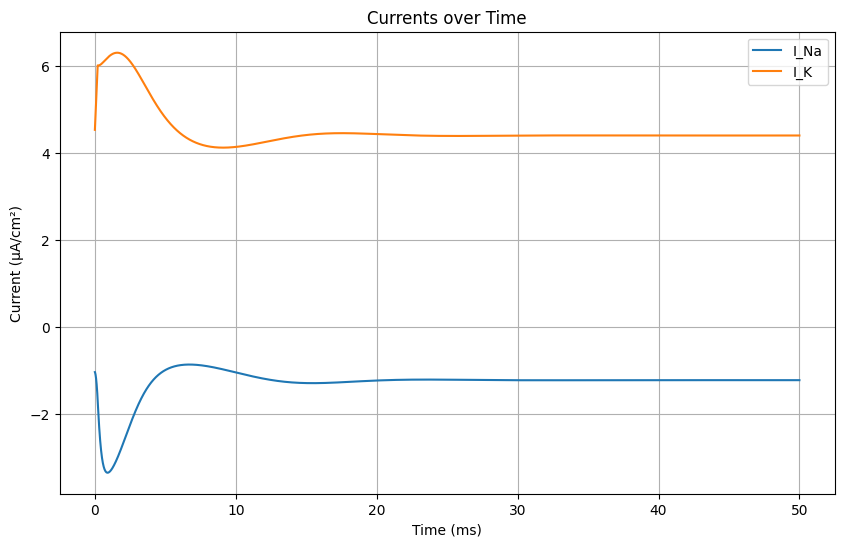

In [12]:
# Hodgkin-Huxley model equations
def hh_model(y, t, I_amp, duration):
    V, n, m, h = y
    gNa, gK, gL = 120, 36, 0.3
    ENa, EK, EL = 50, -77, -54.4
    C = 1

    # Alpha and beta functions
    # alpha_n = 0.02 * (V - 25) / (1 - np.exp(-(V - 25) / 9))
    # beta_n = -0.002 * (V - 25) / (1 - np.exp((V - 25) / 9))
    # alpha_m = 0.182 * (V + 35) / (1 - np.exp(-(V + 35) / 9))
    # beta_m = -0.124 * (V + 35) / (1 - np.exp((V + 35) / 9))
    # alpha_h = 0.25 * np.exp(-(V + 90) / 12)
    # beta_h = 0.25 * np.exp((V + 62) / 6) / np.exp((V + 90) / 12)

    alpha_m = 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))
    beta_m = 4 * np.exp(-(V + 65) / 18)
    alpha_h = 0.07 * np.exp(-(V + 65) / 20)
    beta_h = 1 / (1 + np.exp(-(V + 35) / 10))
    alpha_n = 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))
    beta_n = 0.125 * np.exp(-(V + 65) / 80)

    # Gating variables derivatives
    dn = alpha_n * (1 - n) - beta_n * n
    dm = alpha_m * (1 - m) - beta_m * m
    dh = alpha_h * (1 - h) - beta_h * h

    # Currents
    g_Na = gNa * (m**3) * h
    g_K = gK * (n**4)
    INa = g_Na * (V - ENa)
    IK = g_K * (V - EK)
    IL = gL * (V - EL)

    # Current pulse
    I = I_amp if t < duration else 0

    # Membrane potential derivative
    dV = (I - INa - IK - IL) / C

    return [dV, dn, dm, dh]

# Simulate Hodgkin-Huxley model for a given current pulse
def simulate_hh(I_amp, duration):
    y0 = [-65, 0.32, 0.05, 0.6]
    t = np.linspace(0, 50, 10000)
    solution = odeint(hh_model, y0, t, args=(I_amp, duration))
    V = solution[:, 0]
    n = solution[:, 1]
    m = solution[:, 2]
    h = solution[:, 3]

    # Calculate conductances
    gNa = 120 * (m**3) * h
    gK = 36 * (n**4)

    # Calculate currents
    ENa, EK = 50, -77
    INa = gNa * (V - ENa)
    IK = gK * (V - EK)

    return t, V, gNa, gK, n, m, h, INa, IK

# Parameters for the current pulse
I_amp = 20  # μA/cm²
duration = 0.2  # ms

# Simulate the model
t, V, gNa, gK, n, m, h, INa, IK = simulate_hh(I_amp, duration)

# Plot INa and IK
plt.figure(figsize=(10, 6))
plt.plot(t, INa, label='I_Na')
plt.plot(t, IK, label='I_K')
plt.title('Currents over Time')
plt.xlabel('Time (ms)')
plt.ylabel('Current (μA/cm²)')
plt.legend()
plt.grid(True)
plt.show()


# d) The effect of increasing the capacitance of membrane

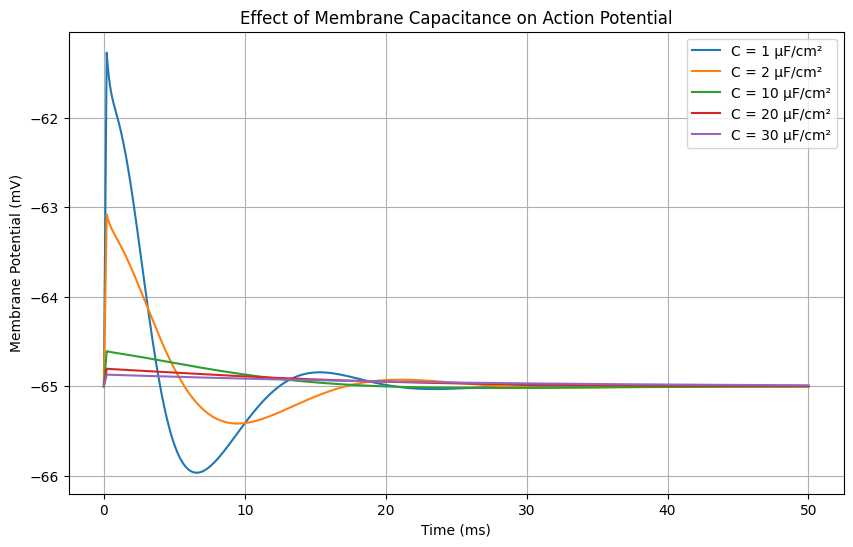

In [14]:
# Hodgkin-Huxley model equations
def hh_model(y, t, I_amp, duration, C):
    V, n, m, h = y
    gNa, gK, gL = 120, 36, 0.3
    ENa, EK, EL = 50, -77, -54.4

    # Alpha and beta functions
    # alpha_n = 0.02 * (V - 25) / (1 - np.exp(-(V - 25) / 9))
    # beta_n = -0.002 * (V - 25) / (1 - np.exp((V - 25) / 9))
    # alpha_m = 0.182 * (V + 35) / (1 - np.exp(-(V + 35) / 9))
    # beta_m = -0.124 * (V + 35) / (1 - np.exp((V + 35) / 9))
    # alpha_h = 0.25 * np.exp(-(V + 90) / 12)
    # beta_h = 0.25 * np.exp((V + 62) / 6) / np.exp((V + 90) / 12)

    alpha_m = 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))
    beta_m = 4 * np.exp(-(V + 65) / 18)
    alpha_h = 0.07 * np.exp(-(V + 65) / 20)
    beta_h = 1 / (1 + np.exp(-(V + 35) / 10))
    alpha_n = 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))
    beta_n = 0.125 * np.exp(-(V + 65) / 80)

    # Gating variables derivatives
    dn = alpha_n * (1 - n) - beta_n * n
    dm = alpha_m * (1 - m) - beta_m * m
    dh = alpha_h * (1 - h) - beta_h * h

    # Currents
    g_Na = gNa * (m**3) * h
    g_K = gK * (n**4)
    INa = g_Na * (V - ENa)
    IK = g_K * (V - EK)
    IL = gL * (V - EL)

    # Current pulse
    I = I_amp if t < duration else 0

    # Membrane potential derivative
    dV = (I - INa - IK - IL) / C

    return [dV, dn, dm, dh]

# Simulate Hodgkin-Huxley model for a given current pulse and capacitance
def simulate_hh(I_amp, duration, C):
    y0 = [-65, 0.32, 0.05, 0.6]
    t = np.linspace(0, 50, 10000)
    solution = odeint(hh_model, y0, t, args=(I_amp, duration, C))
    V = solution[:, 0]
    n = solution[:, 1]
    m = solution[:, 2]
    h = solution[:, 3]

    return t, V, n, m, h

# Parameters for the current pulse
I_amp = 20  # μA/cm²
duration = 0.2  # ms
C_default = 1  # μF/cm² (default capacitance)
C_increased = 2  # μF/cm² (increased capacitance)
C_increased_1 = 10  # μF/cm² (increased capacitance)
C_increased_2 = 20  # μF/cm² (increased capacitance)
C_increased_3 = 30  # μF/cm² (increased capacitance)

# Simulate the model with default capacitance
t_default, V_default, n_default, m_default, h_default = simulate_hh(I_amp, duration, C_default)

# Simulate the model with increased capacitance
t_increased, V_increased, n_increased, m_increased, h_increased = simulate_hh(I_amp, duration, C_increased)

t_increased_1, V_increased_1, n_increased_1, m_increased_1, h_increased_1 = simulate_hh(I_amp, duration, C_increased_1)
t_increased_2, V_increased_2, n_increased_2, m_increased_2, h_increased_2 = simulate_hh(I_amp, duration, C_increased_2)
t_increased_3, V_increased_3, n_increased_3, m_increased_3, h_increased_3 = simulate_hh(I_amp, duration, C_increased_3)

# Plot the action potentials
plt.figure(figsize=(10, 6))
plt.plot(t_default, V_default, label=f'C = {C_default} μF/cm²')
plt.plot(t_increased, V_increased, label=f'C = {C_increased} μF/cm²')
plt.plot(t_increased_1, V_increased_1, label=f'C = {C_increased_1} μF/cm²')
plt.plot(t_increased_2, V_increased_2, label=f'C = {C_increased_2} μF/cm²')
plt.plot(t_increased_3, V_increased_3, label=f'C = {C_increased_3} μF/cm²')
plt.title('Effect of Membrane Capacitance on Action Potential')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.legend()
plt.grid(True)
plt.show()


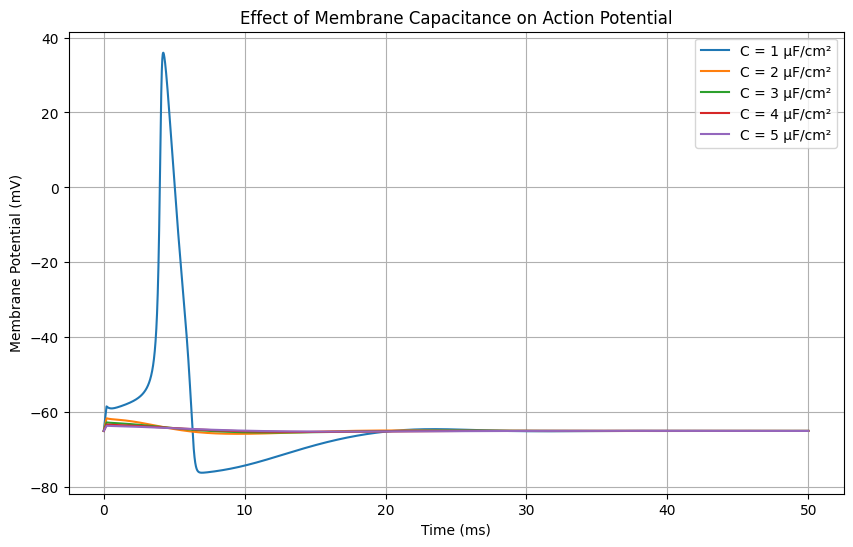

In [20]:
# Hodgkin-Huxley model equations
def hh_model(y, t, I_amp, duration, C):
    V, n, m, h = y
    gNa, gK, gL = 120, 36, 0.3
    ENa, EK, EL = 50, -77, -54.4

    # Alpha and beta functions
    # alpha_n = 0.02 * (V - 25) / (1 - np.exp(-(V - 25) / 9))
    # beta_n = -0.002 * (V - 25) / (1 - np.exp((V - 25) / 9))
    # alpha_m = 0.182 * (V + 35) / (1 - np.exp(-(V + 35) / 9))
    # beta_m = -0.124 * (V + 35) / (1 - np.exp((V + 35) / 9))
    # alpha_h = 0.25 * np.exp(-(V + 90) / 12)
    # beta_h = 0.25 * np.exp((V + 62) / 6) / np.exp((V + 90) / 12)

    alpha_m = 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))
    beta_m = 4 * np.exp(-(V + 65) / 18)
    alpha_h = 0.07 * np.exp(-(V + 65) / 20)
    beta_h = 1 / (1 + np.exp(-(V + 35) / 10))
    alpha_n = 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))
    beta_n = 0.125 * np.exp(-(V + 65) / 80)

    # Gating variables derivatives
    dn = alpha_n * (1 - n) - beta_n * n
    dm = alpha_m * (1 - m) - beta_m * m
    dh = alpha_h * (1 - h) - beta_h * h

    # Currents
    g_Na = gNa * (m**3) * h
    g_K = gK * (n**4)
    INa = g_Na * (V - ENa)
    IK = g_K * (V - EK)
    IL = gL * (V - EL)

    # Current pulse
    I = I_amp if t < duration else 0

    # Membrane potential derivative
    dV = (I - INa - IK - IL) / C

    return [dV, dn, dm, dh]

# Simulate Hodgkin-Huxley model for a given current pulse and capacitance
def simulate_hh(I_amp, duration, C):
    y0 = [-65, 0.32, 0.05, 0.6]
    t = np.linspace(0, 50, 10000)
    solution = odeint(hh_model, y0, t, args=(I_amp, duration, C))
    V = solution[:, 0]
    n = solution[:, 1]
    m = solution[:, 2]
    h = solution[:, 3]

    return t, V, n, m, h

# Parameters for the current pulse
I_amp = 35  # μA/cm²
duration = 0.2  # ms
C_default = 1  # μF/cm² (default capacitance)
C_increased = 2  # μF/cm² (increased capacitance)
C_increased_1 = 3  # μF/cm² (increased capacitance)
C_increased_2 = 4  # μF/cm² (increased capacitance)
C_increased_3 = 5  # μF/cm² (increased capacitance)

# Simulate the model with default capacitance
t_default, V_default, n_default, m_default, h_default = simulate_hh(I_amp, duration, C_default)

# Simulate the model with increased capacitance
t_increased, V_increased, n_increased, m_increased, h_increased = simulate_hh(I_amp, duration, C_increased)

t_increased_1, V_increased_1, n_increased_1, m_increased_1, h_increased_1 = simulate_hh(I_amp, duration, C_increased_1)
t_increased_2, V_increased_2, n_increased_2, m_increased_2, h_increased_2 = simulate_hh(I_amp, duration, C_increased_2)
t_increased_3, V_increased_3, n_increased_3, m_increased_3, h_increased_3 = simulate_hh(I_amp, duration, C_increased_3)

# Plot the action potentials
plt.figure(figsize=(10, 6))
plt.plot(t_default, V_default, label=f'C = {C_default} μF/cm²')
plt.plot(t_increased, V_increased, label=f'C = {C_increased} μF/cm²')
plt.plot(t_increased_1, V_increased_1, label=f'C = {C_increased_1} μF/cm²')
plt.plot(t_increased_2, V_increased_2, label=f'C = {C_increased_2} μF/cm²')
plt.plot(t_increased_3, V_increased_3, label=f'C = {C_increased_3} μF/cm²')
plt.title('Effect of Membrane Capacitance on Action Potential')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.legend()
plt.grid(True)
plt.show()


# e) The second excitation with amplitude 40 μA/cm2 after 15 ms

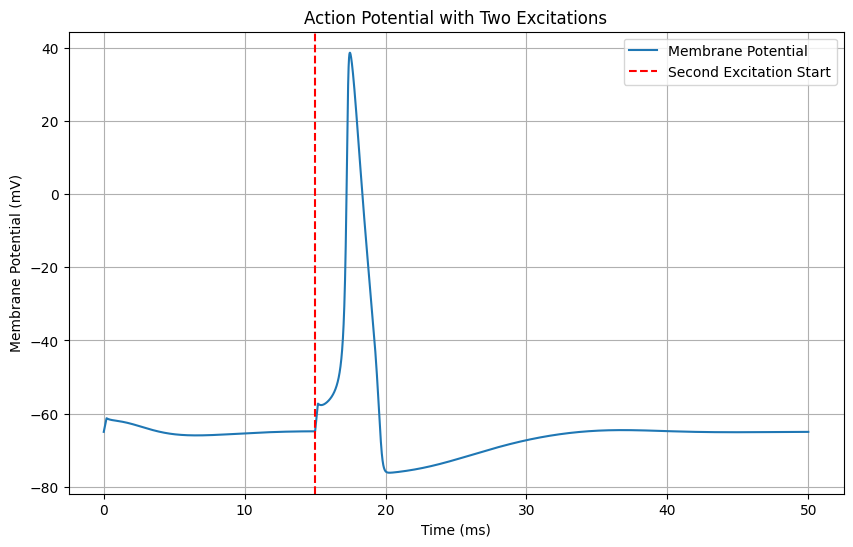

In [15]:
# Hodgkin-Huxley model equations
def hh_model(y, t, I_amp1, duration1, I_amp2, start2, duration2, C):
    V, n, m, h = y
    gNa, gK, gL = 120, 36, 0.3
    ENa, EK, EL = 50, -77, -54.4

    # Alpha and beta functions
    # alpha_n = 0.02 * (V - 25) / (1 - np.exp(-(V - 25) / 9))
    # beta_n = -0.002 * (V - 25) / (1 - np.exp((V - 25) / 9))
    # alpha_m = 0.182 * (V + 35) / (1 - np.exp(-(V + 35) / 9))
    # beta_m = -0.124 * (V + 35) / (1 - np.exp((V + 35) / 9))
    # alpha_h = 0.25 * np.exp(-(V + 90) / 12)
    # beta_h = 0.25 * np.exp((V + 62) / 6) / np.exp((V + 90) / 12)

    alpha_m = 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))
    beta_m = 4 * np.exp(-(V + 65) / 18)
    alpha_h = 0.07 * np.exp(-(V + 65) / 20)
    beta_h = 1 / (1 + np.exp(-(V + 35) / 10))
    alpha_n = 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))
    beta_n = 0.125 * np.exp(-(V + 65) / 80)

    # Gating variables derivatives
    dn = alpha_n * (1 - n) - beta_n * n
    dm = alpha_m * (1 - m) - beta_m * m
    dh = alpha_h * (1 - h) - beta_h * h

    # Currents
    g_Na = gNa * (m**3) * h
    g_K = gK * (n**4)
    INa = g_Na * (V - ENa)
    IK = g_K * (V - EK)
    IL = gL * (V - EL)

    # Current pulse
    if t < duration1:
        I = I_amp1
    elif t >= start2 and t < start2 + duration2:
        I = I_amp2
    else:
        I = 0

    # Membrane potential derivative
    dV = (I - INa - IK - IL) / C

    return [dV, dn, dm, dh]

# Simulate Hodgkin-Huxley model for given current pulses and capacitance
def simulate_hh(I_amp1, duration1, I_amp2, start2, duration2, C):
    y0 = [-65, 0.32, 0.05, 0.6]
    t = np.linspace(0, 50, 10000)
    solution = odeint(hh_model, y0, t, args=(I_amp1, duration1, I_amp2, start2, duration2, C))
    V = solution[:, 0]
    n = solution[:, 1]
    m = solution[:, 2]
    h = solution[:, 3]

    return t, V, n, m, h

# Parameters for the current pulses
I_amp1 = 20  # μA/cm²
duration1 = 0.2  # ms
I_amp2 = 40  # μA/cm²
start2 = 15  # ms
duration2 = 0.2  # ms
C = 1  # μF/cm²

# Simulate the model with the given current pulses
t, V, n, m, h = simulate_hh(I_amp1, duration1, I_amp2, start2, duration2, C)

# Plot the action potential
plt.figure(figsize=(10, 6))
plt.plot(t, V, label='Membrane Potential')
plt.axvline(x=start2, color='r', linestyle='--', label='Second Excitation Start')
plt.title('Action Potential with Two Excitations')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.legend()
plt.grid(True)
plt.show()
